# Opdracht 2

1. Let's get the CSV-file in jupyter
    1. Let's clean the data
        1. Correct the datatypes
        2. Work on the duplicates
        3. Work on outliers
        4. Work on missing values
            1. Does all the data make sense (verifying data with statistics)
    2. Doing analysis

# 1. Lets get the first CSV-file in jupyter

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
#import ipynb.fs.defs.functions2 as enzo

# Remove restrictions on amount of rows and columns that can be displayed in pandas dataframes.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

#data = pd.read_csv(r"C:\Users\jorri\OneDrive\Documenten\WT\Opdracht 2\US_Accidents_June20.csv")

## A. Let's clean the data

## a. Correct the datatypes

In [2]:
# Store datetime columns in datetime format
data['parsed_starttime'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d %H:%M:%S')
data['parsed_endtime'] = pd.to_datetime(data['End_Time'], format='%Y-%m-%d %H:%M:%S')
data['distance_km'] = data['Distance(mi)'] * 1.60934

#State (part II)
data['State'] = data['State'].astype('category') #transform the column State into the datatype category

#Zipcode
data['Zipcode'] = data['Zipcode'].astype('category') #transform the column zipcode into the datatype category

#Country
data.pop('Country') #we can exclude this variable as it all contains US as the whole dataset contains info from the US

#Turning_Loop
data.pop('Turning_Loop') #we can exclude this variable as it all contains False

#Timezone
data['Timezone'] = data['Timezone'].astype('category') #transform the column timezone into the datatype category

#Airport_Code
data['Airport_Code'] = data['Airport_Code'].astype('category') #transform the column Airport_code into the datatype category

#Weather_Timestamp
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'], format='%Y-%m-%d %H:%M:%S')

#Temperature 
data['Temperature(C)'] = ((data['Temperature(F)'] - 32) * (5/9)) #this is the calculation that transforms the fahrenheit to celsius.

#Wind_Chill(F) 
data['Wind_Chill(C)'] = ((data['Wind_Chill(F)'] - 32) * (5/9)) #this is the calculation that transforms the fahrenheit to celsius.

#Pressure(in) - 
data['Pressure(in)'] = data['Pressure(in)'].astype('float') #lets first convert the pressure to float in order to do calculations
data['Pressure(hPa)'] = (data['Pressure(in)'] * 33.86389) #this is the calculation that transforms it from inHg to hPa

#Visibility(mi)
data['Visibility(mi)'] = data['Visibility(mi)'].astype('float') #lets first convert the pressure to float in order to do calculations
data['Visibility(km)'] = (data['Visibility(mi)'] * 1609.344) #this is the calculation that transforms the mi to km.

#Wind_Direction
data['Wind_Direction'].fillna('nan', inplace=True) #transform the NaN to 'NaN'(string) as it is giving problems in further fixing Wind_Direction 
data['Wind_Direction'] = data['Wind_Direction'].str.lower() #in case of differnences lower/higher cases between categories, we can make every category description in lowercase letters
mapping = {'east':'e', 'north':'n', 'south':'s', 'west':'w', 'variable':'other', 'var':'other'} #let's recategorize the potential categories
data['Wind_Direction'] = data['Wind_Direction'].replace(mapping)  #this allows us to replace the transformations stored in the variable mapping
data['Wind_Direction'] = data['Wind_Direction'].replace('nan', np.NaN, regex=True) #lets transform 'NaN' (string) back to NaN and give the outcome 'var' also the NaN-value

#Wind_Speed(mph) 
data['Wind_Speed(kph)'] = (data['Wind_Speed(mph)'] * 1.60934) #this does to trick in transforming the data from mph to kph

#Precipitation(in) 
data['Precipitation(cm)'] = (data['Precipitation(in)'] * 2.54) #this does the trick from inches to cm

#Weather_Condition 
data['Weather_Condition'] = data['Weather_Condition'].astype('category') #transform the column Airport_code into the datatype category

#lets loose the variables that we transformed, which are Temperature(F), Wind_Chill(F), Pressure(in), Visibility(mi), Wind_Speed(mph), Precipitation(in)
data = data.drop(['Temperature(F)', 'Wind_Chill(F)','Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)', 'Start_Time', 'End_Time', 'Distance(mi)'], axis = 1)

In [3]:
#range of values within dates
data['parsed_starttime'].describe() #last datapoint is in june so we are going to create quarterly data as yearly data is not going to work within powerbi
data['quarter'] = pd.PeriodIndex(data.parsed_starttime, freq='Q')

C:\Users\jorri\AppData\Local\Temp/ipykernel_20340/2117302779.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['parsed_starttime'].describe() #last datapoint is in june so we are going to create quarterly data as yearly data is not going to work within powerbi


## b. Work on the duplicates

In [4]:
data = data.drop_duplicates() #lets drop full duplicates
data.info() #we went from ... to ...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3513617 entries, 0 to 3513616
Data columns (total 48 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   TMC                    float64       
 3   Severity               int64         
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Description            object        
 9   Number                 float64       
 10  Street                 object        
 11  Side                   object        
 12  City                   object        
 13  County                 object        
 14  State                  category      
 15  Zipcode                category      
 16  Timezone               category      
 17  Airport_Code           category      
 18  Weather_Timestamp     

## c. Work on outliers

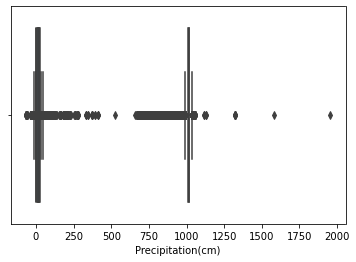

In [5]:
#Build boxplot - temperature 
sns.boxplot(x=data['Temperature(C)'])  #highest recorded temperature in US is 56.7 celsius, the lowest recorderd temperature −56.7. Those are then the limits which will be maintained
data.loc[data['Temperature(C)'] > 56.7] = np.nan #replace values where it is higher than 56.7 with NAN's 
data.loc[data['Temperature(C)'] < -56.7] = np.nan #replace values where it is lower than -56.7 with NAN's 

#Build boxplot - Pressure(hPa) (Part I) - in hold
sns.boxplot(x=data['Pressure(hPa)']) #it seems we have one observation around 2000 and 0 which seems very high and low compared ot the rest of the values so let's chech them out first - air pressure can be affected by altitude, temperature and humidity

#Build boxplot - Wind_Speed(kph)
sns.boxplot(x=data['Wind_Speed(kph)'])
data.loc[data['Wind_Speed(kph)'] > 372] = np.nan #highest windspeed ever recorded in USA is 371.76 kph so everything above is, is not possible

#Build boxplot - Precipitation(cm)
sns.boxplot(x=data['Precipitation(cm)']) 
data.loc[data['Wind_Speed(kph)'] > 50] = np.nan #we don't find the values above 50 cm feasable as the highest amount of daily precipitation is for tennesse 21.082 cm (https://www.afsrepair.com/resources/rainiest-cities-towns-in-tennessee/) and for california is that 0.3302 cm in long beach which is around 15 km from the site (https://www.dailybreeze.com/2021/10/26/new-rainfall-records-set-at-lax-and-long-beach-airport/)

## d. Work on missing values

In [6]:
#lets check the relative share of NA's within each column
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

ID                        0.08
Source                    0.08
TMC                      29.50
Severity                  0.08
Start_Lat                 0.08
Start_Lng                 0.08
End_Lat                  70.58
End_Lng                  70.58
Description               0.08
Number                   64.43
Street                    0.08
Side                      0.08
City                      0.09
County                    0.08
State                     0.08
Zipcode                   0.11
Timezone                  0.19
Airport_Code              0.27
Weather_Timestamp         1.31
Humidity(%)               2.06
Wind_Direction            1.76
Weather_Condition         2.25
Amenity                   0.08
Bump                      0.08
Crossing                  0.08
Give_Way                  0.08
Junction                  0.08
No_Exit                   0.08
Railway                   0.08
Roundabout                0.08
Station                   0.08
Stop                      0.08
Traffic_

In [8]:
#data.to_csv("parsed_data.csv", index = False)
#data.to_csv(r'C:\Users\jorri\OneDrive\Documenten\WT\Opdracht 2\parsed_data.csv', index = False)

### i. Does all the data make sense (verifying data with statistics)

# B. Doing analysis